In [15]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Rescaling
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
data_path ="C:\\Users\\lohit\\OneDrive\\Desktop\\task4\\leapGestRecog"
img_size = (64, 64)
batch_size = 32

In [36]:
train_ds = image_dataset_from_directory(
    data_path,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42,
)
val_ds = image_dataset_from_directory(
    data_path,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
)
class_names = train_ds.class_names
num_classes = len(class_names)

Found 40000 files belonging to 11 classes.
Using 32000 files for training.
Found 40000 files belonging to 11 classes.
Using 8000 files for validation.


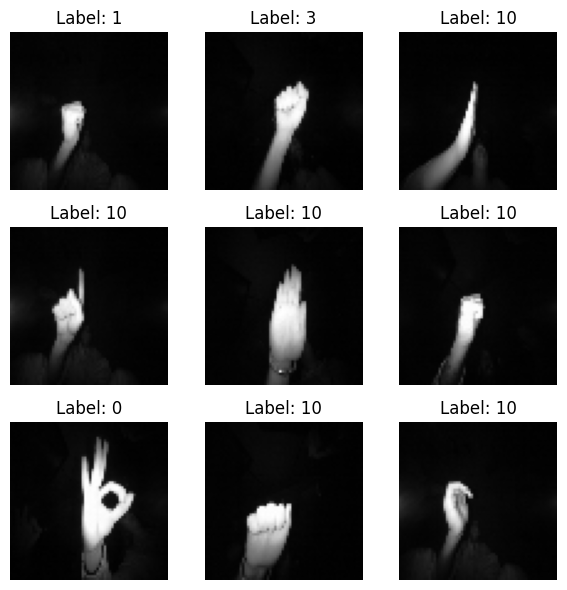

In [37]:
# Display 9 images in a 3x3 grid
for images, labels in train_ds.take(1):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        img = images[i].numpy().squeeze()  # Remove channel dimension
        img = (img - img.min()) / (img.max() - img.min() + 1e-5)  # Normalize
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [38]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 139ms/step - accuracy: 0.4501 - loss: 2.7583 - val_accuracy: 0.4848 - val_loss: 0.8118
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 128s 128ms/step - accuracy: 0.4882 - loss: 0.8732 - val_accuracy: 0.4796 - val_loss: 0.7619
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 122ms/step - accuracy: 0.4970 - loss: 0.8013 - val_accuracy: 0.4711 - val_loss: 0.7454
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 123s 123ms/step - accuracy: 0.4956 - loss: 0.7636 - val_accuracy: 0.4791 - val_loss: 0.7370
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 125s 124ms/step - accuracy: 0.4881 - loss: 0.7498 - val_accuracy: 0.4781 - val_loss: 0.7370
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 362s 362ms/step - accuracy: 0.4973 - loss: 0.7420 - val_accuracy: 0.4803 - val_loss: 0.7304
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 122ms/step - accuracy: 0.4982 - loss: 0.7346 - val_accuracy: 0.4831 - val_loss: 0.7188
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 202ms/step - ac

In [41]:
# Save the trained model
model.save("gesture_recognition_model.h5")

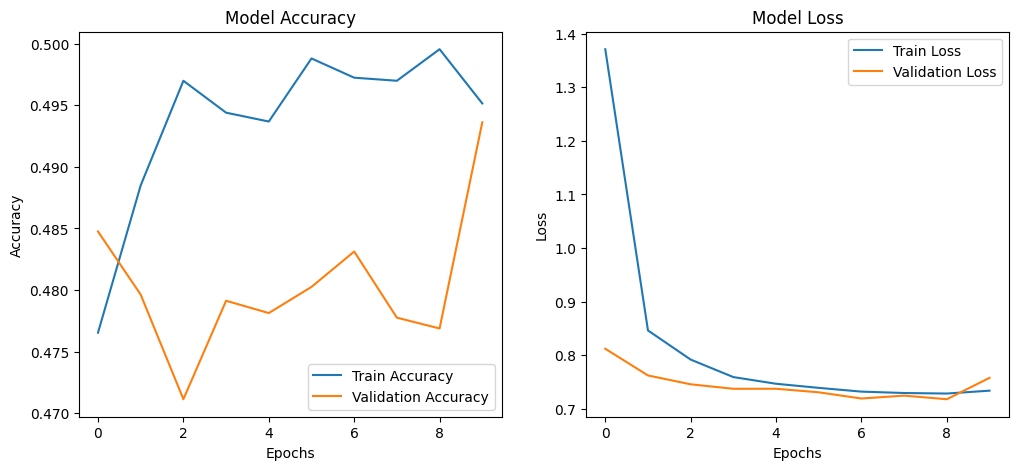

In [42]:
# Visualization of training process
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [43]:
# Load the trained model for evaluation
model = load_model("gesture_recognition_model.h5")

In [44]:
# Model evaluation
y_true = []
y_pred = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [45]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

           00       0.49      0.34      0.40       406
           01       0.36      0.06      0.10       399
           02       0.51      0.73      0.60       415
           03       0.48      0.88      0.62       377
           04       0.48      0.16      0.24       397
           05       0.00      0.00      0.00       433
           06       0.52      0.47      0.50       398
           07       0.54      0.25      0.34       395
           08       0.47      0.12      0.19       397
           09       0.50      0.53      0.51       411
leapGestRecog       0.49      0.64      0.56      3972

     accuracy                           0.49      8000
    macro avg       0.44      0.38      0.37      8000
 weighted avg       0.46      0.49      0.45      8000



C:\Users\lohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

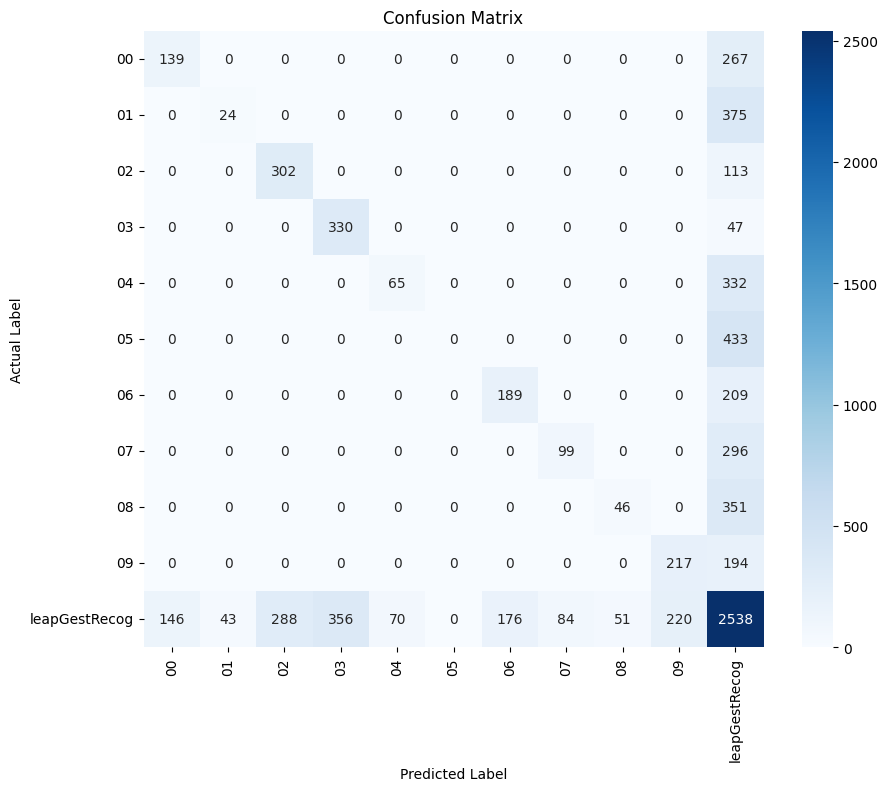

In [50]:
# Confusion matrix
conf = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [51]:
def start_camera():
    cap = cv2.VideoCapture(0)
    print("Press 'q' to close the camera.")
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Preprocess the frame
        imgage = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        imgage = cv2.resize(imgage, (64, 64))
        imgage = imgage / 255.0  # Normalize
        imgage = np.expand_dims(imgage, axis=0) 
        # Predict the gesture
        predictions = model.predict(imgage)
        class_index = np.argmax(predictions)
        class_name = class_names[class_index]
        confidence = predictions[0][class_index] * 100
        # Load the corresponding gesture image
        gesture_image_path = f"path/to/gesture_images/{class_name}.jpg"  # Ensure gesture images are named accordingly
        gesture_image = cv2.imread(gesture_image_path)
        h, w = 0, 0  # Default values in case image is not found
        if gesture_image is not None:
            gesture_image = cv2.resize(gesture_image, (200, 200))  # Resize to fit overlay
            h, w, _ = gesture_image.shape
            frame[10:10+h, 10:10+w] = gesture_image  # Overlay gesture image on camera feed
        text = f"{class_name} ({confidence:.2f}%)"
        text_y = 10 + h + 30 if h > 0 else 50  # Adjust text position dynamically
        cv2.putText(frame, text, (10, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Hand Gesture Recognition", frame)
        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
# Run the camera
start_camera()

Press 'q' to close the camera.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms